<a href="https://colab.research.google.com/github/shihapalden/ML-Projects/blob/main/E_Commerce_Product_Return_Prediction_with_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [78]:
data = pd.read_csv('ecommerce_returns_balanced.csv')
data.head(5)

,product_price,customer_purchase_count,product_rating,quantity_ordered,customer_return_rate,is_returned,price_per_unit
0,400.0,2,1.9,2,0.52,1,200.0
1,220.0,1,1.2,5,0.60,1,44.0
2,400.0,1,2.7,5,0.51,1,80.0
3,330.0,4,2.1,3,0.55,1,110.0
4,390.0,2,2.4,2,0.51,1,195.0


In [79]:
print("\n🔹 Target Value Counts (is_returned):")
print(data['is_returned'].value_counts())


🔹 Target Value Counts (is_returned):
is_returned
1    66
0    60
Name: count, dtype: int64


In [80]:
X = data.drop('is_returned', axis=1)
Y = data['is_returned']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [81]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [86]:
Y_pred = model.predict(X_test)
Y_proba = model.predict_proba(X_test)[:1]

Accuracy: 0.9615384615384616

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.93      0.96        14

    accuracy                           0.96        26
   macro avg       0.96      0.96      0.96        26
weighted avg       0.96      0.96      0.96        26



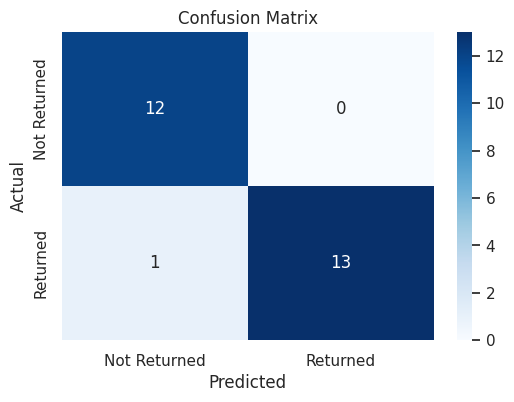

In [87]:
print("Accuracy:", accuracy_score(Y_test, Y_pred))

print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Returned", "Returned"], yticklabels=["Not Returned", "Returned"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [90]:
data.columns

Index(['product_price', 'customer_purchase_count', 'product_rating',
       'quantity_ordered', 'customer_return_rate', 'is_returned',
       'price_per_unit'],
      dtype='object')

In [113]:
new_order = pd.DataFrame([{
    'product_price': 150.0,
    'customer_purchase_count': 7,
    'product_rating': 4.8,
    'quantity_ordered': 10,
    'customer_return_rate': 15.50,
    'price_per_unit': 75.0
}])
# Predict class
predicted_class = model.predict(new_order)[0]

# Predict probability of return
predicted_proba = model.predict_proba(new_order)[0][1]

# Output the result
print("Prediction for New Order:")
print(f"Will be returned? {'Yes' if predicted_class == 1 else 'No'}")
print(f"Probability of return: {predicted_proba:.2f}")

Prediction for New Order:
Will be returned? No
Probability of return: 0.04
